<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# EPAT Session 1

**Executive Program in Algorithmic Trading**

**_Vectorized Backtesting_**

Prof. Dr. Yves J. Hilpisch | The Python Quants GmbH | http://tpq.io

<a href="https://home.tpq.io/certificates/pyalgo" target="_blank"><img src="https://hilpisch.com/pyalgo_cover_shadow.png" width="300px" align="left"></a>

## Basic Imports

In [1]:
# import cufflinks
import numpy as np
import pandas as pd
from pylab import plt
plt.style.use('seaborn-v0_8')
pd.set_option('mode.chained_assignment', None)
np.set_printoptions(suppress=True)
# cufflinks.set_config_file(offline=True)
%config InlineBackend.figure_format = 'svg'

## Reading Financial Data

In [2]:
url = 'https://certificate.tpq.io/findata.csv'

In [3]:
raw = pd.read_csv(url, index_col=0, parse_dates=True)

In [4]:
# raw.head()

In [5]:
rn = np.random.standard_normal(len(raw))

In [6]:
rn[0] = 0.0

In [7]:
raw['RANDOM'] = 100 + rn.cumsum()

## Efficient Markets

In [8]:
symbol = 'EUR='
# symbol = 'GLD'
# symbol = 'SPY'
# symbol = 'RANDOM'

In [9]:
data = pd.DataFrame(raw[symbol]).dropna()

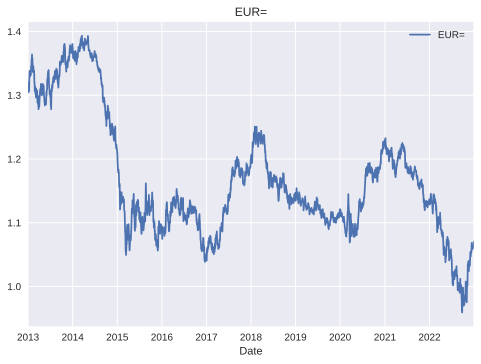

In [10]:
data.plot(title=symbol);

In [11]:
lags = 7
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data[symbol].shift(lag)
    cols.append(col)

In [12]:
data.head(8)

,EUR=,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,
2013-01-01,1.3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,1.3184,1.3204,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,1.3046,1.3184,1.3204,NaN,NaN,NaN,NaN,NaN
2013-01-04,1.3067,1.3046,1.3184,1.3204,NaN,NaN,NaN,NaN
2013-01-07,1.3115,1.3067,1.3046,1.3184,1.3204,NaN,NaN,NaN
2013-01-08,1.3080,1.3115,1.3067,1.3046,1.3184,1.3204,NaN,NaN
2013-01-09,1.3063,1.3080,1.3115,1.3067,1.3046,1.3184,1.3204,NaN
2013-01-10,1.3269,1.3063,1.3080,1.3115,1.3067,1.3046,1.3184,1.3204


In [13]:
data.dropna(inplace=True)

In [14]:
cols

['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5', 'lag_6', 'lag_7']

In [15]:
reg = np.linalg.lstsq(data[cols], data[symbol], rcond=None)[0]

In [16]:
reg

array([ 0.98335872,  0.02781021, -0.02411452,  0.00926478,  0.02366744,
       -0.07997631,  0.05989504])

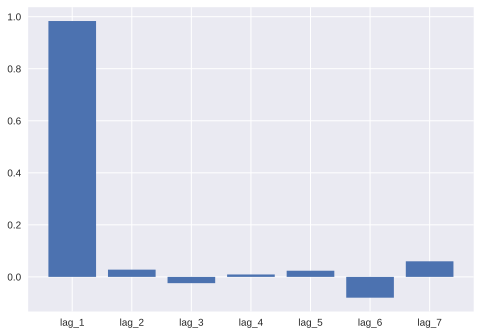

In [17]:
plt.bar(cols, reg);

In [18]:
data[cols].corr()  # major assumption of OLS regression violated (= "for the sake of illustration")

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
lag_1,1.000000,0.998243,0.996551,0.994818,0.993129,0.991454,0.989705
lag_2,0.998243,1.000000,0.998244,0.996553,0.994820,0.993131,0.991455
lag_3,0.996551,0.998244,1.000000,0.998244,0.996553,0.994821,0.993132
lag_4,0.994818,0.996553,0.998244,1.000000,0.998245,0.996552,0.994820
lag_5,0.993129,0.994820,0.996553,0.998245,1.000000,0.998241,0.996548
lag_6,0.991454,0.993131,0.994821,0.996552,0.998241,1.000000,0.998242
lag_7,0.989705,0.991455,0.993132,0.994820,0.996548,0.998242,1.000000


## OLS Regression Based Trading Strategy

We want to use **historical returns** to predict the **direction of next days market movement** (i.e. the sign of next days return, and not the absolute size).

## Vectorized Backtesting

In trading, it is important to get the **large movements** (in absolute terms) correct.

The following backtesting is done under a number of simplifying assumptions, such as zero transaction costs, zero margins for short positions.

In [19]:
# symbol = 'EUR='

In [20]:
data = pd.DataFrame(raw[symbol]).dropna()

In [21]:
data['r'] = np.log(data[symbol] / data[symbol].shift(1))

In [22]:
data['d'] = np.sign(data['r'])

In [23]:
data.head()

,EUR=,r,d
Date,,,
2013-01-01,1.3204,NaN,NaN
2013-01-02,1.3184,-0.001516,-1.0
2013-01-03,1.3046,-0.010522,-1.0
2013-01-04,1.3067,0.001608,1.0
2013-01-07,1.3115,0.003667,1.0


In [24]:
# lags = 7
cols = list()
for lag in range(1, lags + 1):
    col = f'lag_{lag}'
    data[col] = data['r'].shift(lag)
    cols.append(col)

In [25]:
data.head(8)

,EUR=,r,d,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
Date,,,,,,,,,,
2013-01-01,1.3204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-02,1.3184,-0.001516,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-03,1.3046,-0.010522,-1.0,-0.001516,NaN,NaN,NaN,NaN,NaN,NaN
2013-01-04,1.3067,0.001608,1.0,-0.010522,-0.001516,NaN,NaN,NaN,NaN,NaN
2013-01-07,1.3115,0.003667,1.0,0.001608,-0.010522,-0.001516,NaN,NaN,NaN,NaN
2013-01-08,1.3080,-0.002672,-1.0,0.003667,0.001608,-0.010522,-0.001516,NaN,NaN,NaN
2013-01-09,1.3063,-0.001301,-1.0,-0.002672,0.003667,0.001608,-0.010522,-0.001516,NaN,NaN
2013-01-10,1.3269,0.015647,1.0,-0.001301,-0.002672,0.003667,0.001608,-0.010522,-0.001516,NaN


In [26]:
data.dropna(inplace=True)

In [27]:
data[cols].corr()  # lagged returns are "not" correlated with each other (corr vals close to 0)

,lag_1,lag_2,lag_3,lag_4,lag_5,lag_6,lag_7
lag_1,1.000000,-0.012767,0.010037,-0.015155,0.001615,0.015270,-0.064079
lag_2,-0.012767,1.000000,-0.012500,0.009936,-0.015355,0.001650,0.015369
lag_3,0.010037,-0.012500,1.000000,-0.012636,0.009957,-0.014827,0.001671
lag_4,-0.015155,0.009936,-0.012636,1.000000,-0.012547,0.009320,-0.014905
lag_5,0.001615,-0.015355,0.009957,-0.012547,1.000000,-0.012881,0.009309
lag_6,0.015270,0.001650,-0.014827,0.009320,-0.012881,1.000000,-0.012607
lag_7,-0.064079,0.015369,0.001671,-0.014905,0.009309,-0.012607,1.000000


In [28]:
reg = np.linalg.lstsq(data[cols], data['r'], rcond=None)[0]

In [29]:
reg

array([-0.0124471 ,  0.01125906, -0.01655988,  0.0014945 ,  0.01811965,
       -0.06364195, -0.02905261])

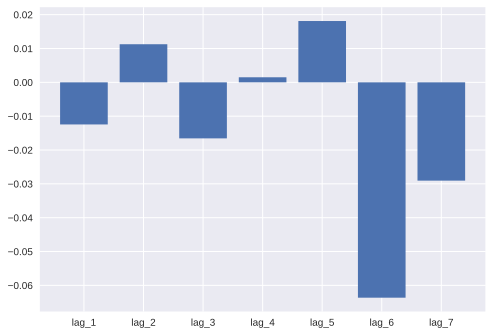

In [30]:
plt.bar(cols, reg);

In [31]:
data['e'] = np.dot(data[cols], reg)  # multiplies matrix with vector

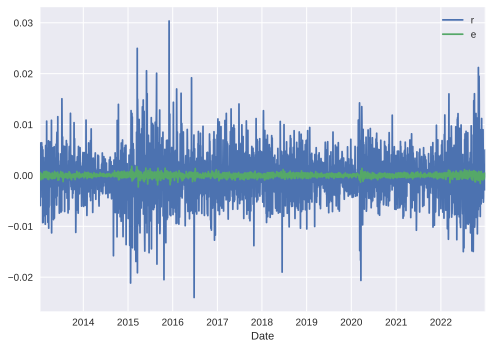

In [32]:
data[['r', 'e']].plot();

In [33]:
# accuracy of the directional prediction ("statistical measure")
np.sum(data['d'] == np.sign(data['e'])) / len(data)

0.5221068819684737

In [34]:
data['p'] = np.sign(data['e'])  # predicted direction = position in the market

In [35]:
data['s'] = data['p'] * data['r']  # strategy return = position * market return

In [36]:
# data

REMARK: simplifying assumptions are, among others, in-sample testing, no margin for short positions, no transaction costs

In [37]:
data[['r', 's']].sum()  # sum of log returns

r   -0.215000
s    0.743108
dtype: float64

In [38]:
data[['r', 's']].sum().apply(np.exp)  # gross return of the market vs. the strategy

r    0.806542
s    2.102460
dtype: float64

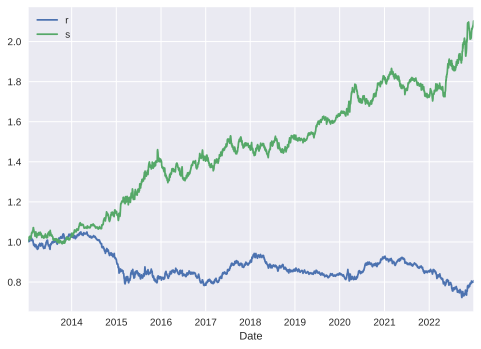

In [39]:
data[['r', 's']].cumsum().apply(np.exp).plot();  # gross return over time of the market vs. the strategy

### Train-Test Split

In [40]:
len(data)

2601

In [41]:
split = int(len(data) * 0.8)
split

2080

In [42]:
train = data.iloc[:split].copy()

In [43]:
reg = np.linalg.lstsq(train[cols], train['r'], rcond=None)[0]

In [44]:
reg

array([-0.01889136,  0.02176981, -0.01661991, -0.00604376,  0.02603854,
       -0.05554501, -0.01893769])

In [45]:
test = data.iloc[split:].copy()

In [46]:
test['e'] = np.dot(test[cols], reg)
# prediction step ("estimation"), given the regression results and the historical (= lagged) data

In [47]:
test['p'] = np.sign(test['e'])

In [48]:
test['s'] = test['p'] * test['r']

In [49]:
test[['r', 's']].sum().apply(np.exp)  # gross returns on test data set

r    0.876279
s    1.243959
dtype: float64

In [50]:
test[['r', 's']].sum().apply(np.exp) - 1  # net returns on test data set

r   -0.123721
s    0.243959
dtype: float64

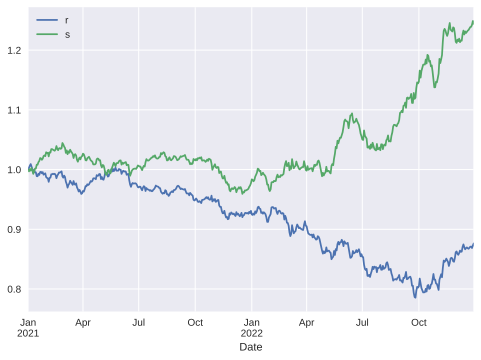

In [51]:
test[['r', 's']].cumsum().apply(np.exp).plot();  # gross returns over time on test data set

In [57]:
#!pip install quantstats

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.5/45.5 kB 1.3 MB/s eta 0:00:00


In [58]:
import quantstats as qs

In [60]:
qs.reports.metrics(test['s'], benchmark=test['r'])

                    Benchmark    Strategy
------------------  -----------  ----------
Start Period        2021-01-01   2021-01-01
End Period          2022-12-30   2022-12-30
Risk-Free Rate      0.0%         0.0%
Time in Market      99.0%        99.0%

Cumulative Return   -12.96%      23.57%
CAGR﹪              -4.69%       7.6%

Sharpe              -0.79        1.31
Prob. Sharpe Ratio  12.87%       97.22%
Sortino             -1.1         2.06
Sortino/√2          -0.78        1.46
Omega               1.25         1.25

Max Drawdown        -22.56%      -8.28%
Longest DD Days     723          446

Gain/Pain Ratio     -0.13        0.25
Gain/Pain (1M)      -0.47        1.4

Payoff Ratio        1.0          1.0
Profit Factor       0.87         1.25
Common Sense Ratio  0.85         1.44
CPC Index           0.42         0.67
Tail Ratio          0.98         1.15
Outlier Win Ratio   3.97         3.69
Outlier Loss Ratio  2.99         3.22

MTD                 2.83%        1.31%
3M                

In [62]:
#qs.reports.basic(test['s'], benchmark=test['r'])

## Vectorized Backtesting (OOP Way)

### `FinancialData` Class

In [63]:
class FinancialData:
    url = 'https://certificate.tpq.io/findata.csv'
    def __init__(self, symbol):
        self.symbol = symbol
        self.retrieve_data()
        self.prepare_data()
    def retrieve_data(self):
        self.raw = pd.read_csv(self.url, index_col=0, parse_dates=True)
    def prepare_data(self):
        self.data = pd.DataFrame(self.raw[self.symbol]).dropna()
        self.data['r'] = np.log(self.data / self.data.shift(1))
    def plot_data(self, cols=None):
        if cols is None:
            cols = [self.symbol]
        self.data[cols].plot(title=self.symbol)

In [64]:
fd = FinancialData(symbol)

In [65]:
fd.data.head()

,EUR=,r
Date,,
2013-01-01,1.3204,NaN
2013-01-02,1.3184,-0.001516
2013-01-03,1.3046,-0.010522
2013-01-04,1.3067,0.001608
2013-01-07,1.3115,0.003667


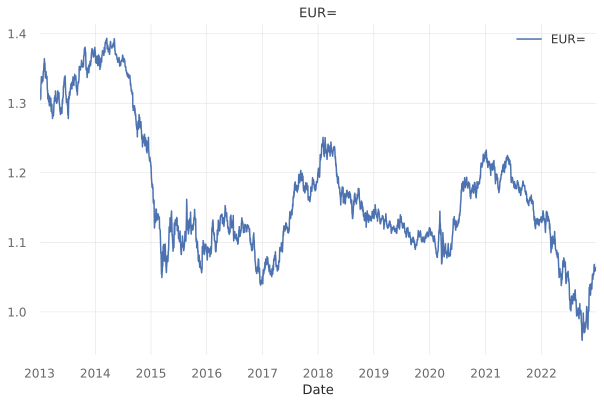

In [66]:
fd.plot_data()

### Vectorized Backtesting Class

The following class implements the backtest based on an "in-sample" approach (no train-test split).

In [67]:
class OLSBacktester(FinancialData):
    def prepare_lags(self):
        self.cols = list()
        for lag in range(1, self.lags + 1):
            col = f'lag_{lag}'
            self.data[col] = self.data['r'].shift(lag)
            self.cols.append(col)
    def backtest_strategy(self, lags, start=None):
        if start is None:
            start = lags
        self.lags = lags
        self.prepare_lags()
        reg = np.linalg.lstsq(self.data[self.cols].iloc[start + 1:],
                              self.data['r'].iloc[start + 1:], rcond=None)[0]  # regression step
        self.data['e'] = np.dot(self.data[self.cols], reg)  # prediction/estimation step
        self.data['p'] = np.sign(self.data['e'])  # deriving position values
        self.data['s'] = self.data['p'] * self.data['r']  # strategy returns
        perf = self.data[['r', 's']].iloc[start + 1:].sum().apply(np.exp)  # gross returns
        return perf
    def backtest_lags(self, lags_):
        self.results = pd.DataFrame()
        max_lags = max(lags_)
        for lags in lags_:
            perf = self.backtest_strategy(lags, start=max_lags)
            df = pd.DataFrame({'SYM': self.symbol, 'LAGS': lags,
                       'BENCH': perf['r'], 'STRAT': perf['s']}, index=[0])
            self.results = pd.concat((self.results, df), ignore_index=True)

In [68]:
ols = OLSBacktester(symbol)

In [69]:
ols.backtest_strategy(lags=5)

r    0.818196
s    1.387431
dtype: float64

In [70]:
ols.backtest_lags([5, 7, 9, 11, 13, 15])

In [71]:
ols.results.sort_values('STRAT', ascending=False)

,SYM,LAGS,BENCH,STRAT
3,EUR=,11,0.803453,2.941995
5,EUR=,15,0.803453,2.799497
4,EUR=,13,0.803453,2.756191
2,EUR=,9,0.803453,2.323998
1,EUR=,7,0.803453,2.094697
0,EUR=,5,0.803453,1.469908


In [72]:
symbols_ = ['EUR=', 'GLD', 'AAPL.O']
lags_ = [5, 7, 9, 11, 13, 15]
res = pd.DataFrame()
for sym in symbols_:
    ols = OLSBacktester(sym)
    ols.backtest_lags(lags_)
    res = pd.concat((res, ols.results), ignore_index=True)

In [73]:
res

,SYM,LAGS,BENCH,STRAT
0,EUR=,5,0.803453,1.469908
1,EUR=,7,0.803453,2.094697
2,EUR=,9,0.803453,2.323998
3,EUR=,11,0.803453,2.941995
4,EUR=,13,0.803453,2.756191
5,EUR=,15,0.803453,2.799497
6,GLD,5,1.050923,1.290121
7,GLD,7,1.050923,1.547158
8,GLD,9,1.050923,1.900080
9,GLD,11,1.050923,2.231730


In [74]:
res.groupby('LAGS')['STRAT'].mean()

LAGS
5      1.456768
7      7.279653
9     10.019489
11    12.218812
13    16.446781
15    16.257290
Name: STRAT, dtype: float64

**EXERCISE**: Re-implement the class including train-test split for the backtesting.

<img src="http://certificate.tpq.io/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>